## k-NN(k-Nearest Neighbors) Algorithm
- 훈련 데이터셋에서 새로운 데이터 포인트에 대한 최근접 이웃을 찾는 알고리즘

In [2]:
import numpy as np
import mglearn 
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

import warnings
warnings.filterwarnings(action='ignore') # 경고 메시지를 숨길 때

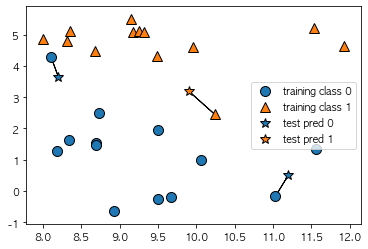

In [3]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

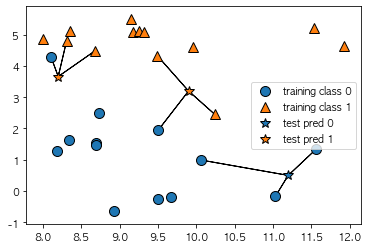

In [4]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

### scikit-learn을 사용하여 k-NN 적용

In [6]:
# train_test_split
from sklearn.model_selection import train_test_split
x,y = mglearn.datasets.make_forge()

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [7]:
# KNeighborsClassifier import, 객체 생성
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [8]:
# train set 학습 - fit method
clf.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [9]:
# test data 예측 - predict method
print('테스트 세트 예측: {}'.format(clf.predict(x_test)))

테스트 세트 예측: [1 0 1 0 1 0 0]


In [11]:
# 성능 평가 - score method
print('테스트 세트 정확도: {:.2f}'.format(clf.score(x_test,y_test)))

테스트 세트 정확도: 0.86


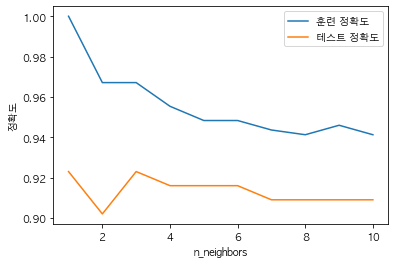

In [13]:
# k의 수에 따른 성능 평가
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
x_train, x_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state = 66)

training_accuracy = []
test_accuracy = []

# k=1~20 적용
neighbors_settings = range(1,11)

for n_neighbors in neighbors_settings:
    # model 생성
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(x_train, y_train)
    # train set accuracy 
    training_accuracy.append(clf.score(x_train,y_train))
    # test set accuracy
    test_accuracy.append(clf.score(x_test,y_test))
    
# accuracy plot 
plt.plot(neighbors_settings, training_accuracy, label='훈련 정확도')
plt.plot(neighbors_settings, test_accuracy, label='테스트 정확도')
plt.ylabel('정확도')
plt.xlabel('n_neighbors')
plt.legend()

### k-NN regression

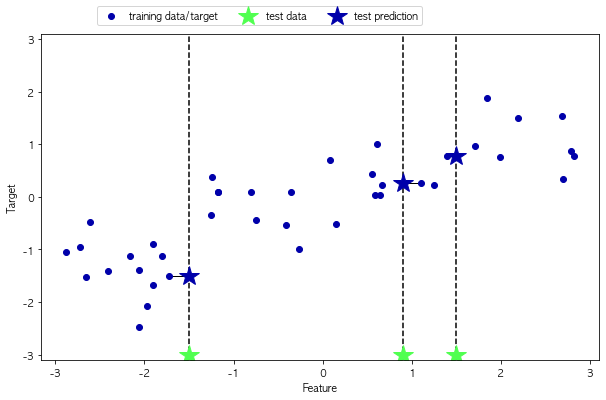

In [14]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

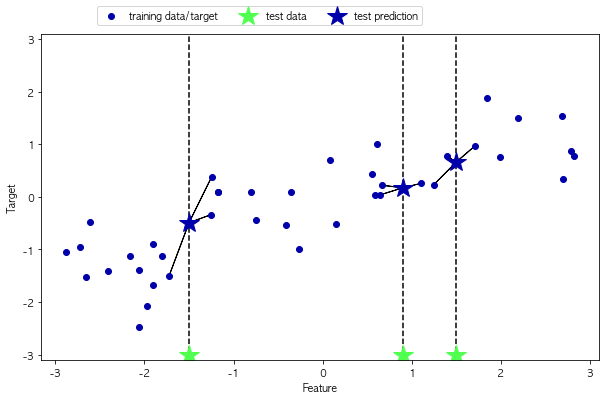

In [15]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [16]:
from sklearn.neighbors import KNeighborsRegressor
x,y = mglearn.datasets.make_wave(n_samples=40)

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=0)

In [18]:
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(x_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [19]:
print('테스트 세트 예측:\n {}'.format(reg.predict(x_test)))

테스트 세트 예측:
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [22]:
print('테스트 세트 R^2: {:.2f}'.format(reg.score(x_test,y_test)))

테스트 세트 R^2: 0.83
